### Tips Dataset 

In [136]:
! pip install pandas numpy matplotlib seaborn 


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [137]:
from seaborn import load_dataset
dataset=load_dataset("tips")

In [138]:
import pandas as pd
df=pd.DataFrame(dataset)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [139]:
shape=df.shape
print("The shape of dataset is:",shape)

The shape of dataset is: (244, 7)


In [140]:
import numpy as np
row=np.size(df,0)
columns=np.size(df,1)
print("row:",row,"columns:",columns)

row: 244 columns: 7


In [141]:
df.axes

[RangeIndex(start=0, stop=244, step=1),
 Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')]

In [142]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [143]:
sex=df["sex"].unique()
print(sex)

['Female', 'Male']
Categories (2, object): ['Male', 'Female']


In [144]:
time=df["time"].unique()
print(time)

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']


In [145]:
day=df["day"].unique()
print(day)

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']


In [146]:
avrage_tip=df["tip"].mean()
print(avrage_tip)

2.99827868852459


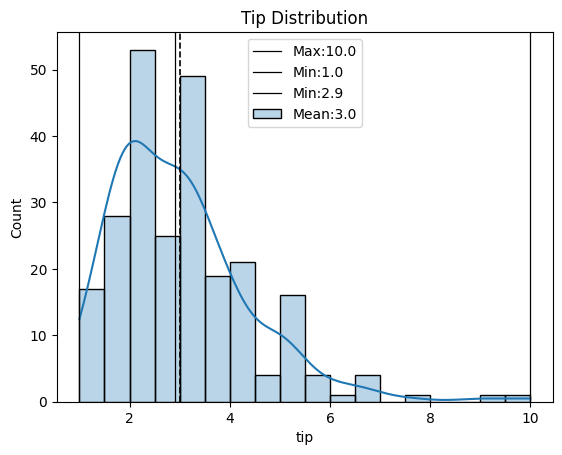

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df["tip"],kde=True,alpha=0.3,label="Mean:{}".format(round(df["tip"].mean(),2)))
plt.axvline(np.mean(df["tip"]),linestyle="dashed",linewidth=1.2,color="black")
plt.axvline(df["tip"].max(),linestyle="solid",linewidth=0.9,color="black",label="Max:{}".format(df["tip"].max()))
plt.axvline(df["tip"].min(),linestyle="solid",linewidth=0.9,color="black",label="Min:{}".format(df["tip"].min()))
plt.axvline(df["tip"].median(),linestyle="solid",linewidth=0.9,color="black",label="Min:{}".format(df["tip"].median()))
plt.title("Tip Distribution")
plt.legend()
plt.show()

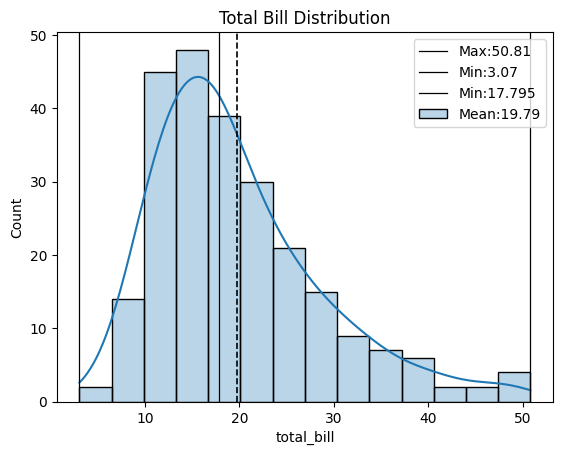

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df["total_bill"],kde=True,alpha=0.3,label="Mean:{}".format(round(df["total_bill"].mean(),2)))
plt.axvline(np.mean(df["total_bill"]),linestyle="dashed",linewidth=1.2,color="black")
plt.axvline(df["total_bill"].max(),linestyle="solid",linewidth=0.9,color="black",label="Max:{}".format(df["total_bill"].max()))
plt.axvline(df["total_bill"].min(),linestyle="solid",linewidth=0.9,color="black",label="Min:{}".format(df["total_bill"].min()))
plt.axvline(df["total_bill"].median(),linestyle="solid",linewidth=0.9,color="black",label="Min:{}".format(df["total_bill"].median()))
plt.title("Total Bill Distribution")
plt.legend()
plt.show()

In [149]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [150]:
import warnings 
warnings.filterwarnings("ignore")

max_customer_on_the_day=df.groupby("day")["size"].count().sort_values(ascending=False).index[0]
print(max_customer_on_the_day)
print(max_customer_on_the_day,"has the maximum number of customers")

Sat
Sat has the maximum number of customers


In [151]:
df.groupby("sex")["tip"].mean()


sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [152]:
Average_tip_by_gender=df.groupby("sex")["tip"].mean().reset_index()
Average_tip_by_gender

,sex,tip
0,Male,3.089618
1,Female,2.833448


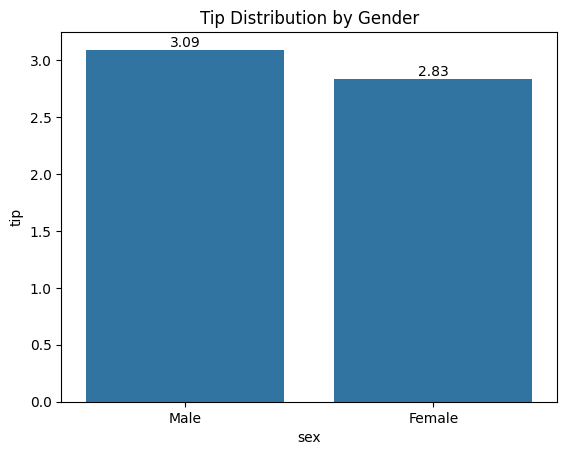

In [153]:
bars=sns.barplot(x="sex",y="tip",data=Average_tip_by_gender)
for i in bars.patches:
    height=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height,f"{round(height,2)}",ha="center",va="bottom")
plt.title("Tip Distribution by Gender")
plt.show()

In [154]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [155]:
df["Weekend"]=df["day"].isin(["Sat","Sun"]).astype("int")

In [156]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,Weekend
0,16.99,1.01,Female,No,Sun,Dinner,2,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1


In [157]:
df.groupby("Weekend")["tip"].mean()

Weekend
0    2.762840
1    3.115276
Name: tip, dtype: float64

In [158]:
Average_tip_on_weekdays=df.groupby("Weekend")["tip"].mean().reset_index()
mapp={0:"Non-Weekend",1:"Weekend"}
Average_tip_on_weekdays["Weekend"]=Average_tip_on_weekdays["Weekend"].map(mapp)

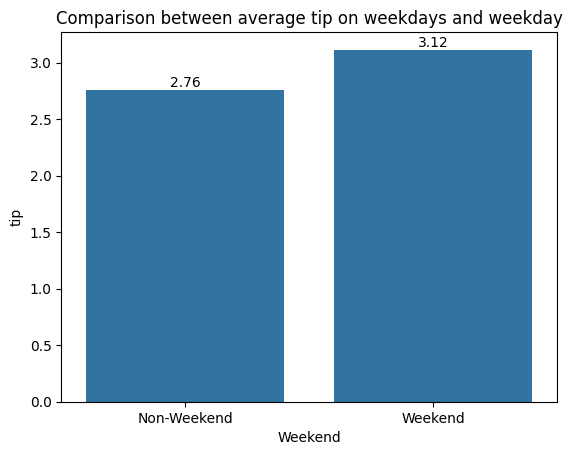

In [159]:
bar=sns.barplot(x=Average_tip_on_weekdays["Weekend"],y=Average_tip_on_weekdays["tip"])
for i in bar.patches:
    height=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height,f"{round(height,2)}",ha="center",va="bottom")
plt.title("Comparison between average tip on weekdays and weekday")
plt.show()

In [160]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,Weekend
0,16.99,1.01,Female,No,Sun,Dinner,2,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1


In [161]:
df.groupby("smoker")["tip"].mean()

smoker
Yes    3.008710
No     2.991854
Name: tip, dtype: float64

In [162]:
smoker_give_tip=df.groupby("smoker")["tip"].mean().reset_index()
smoker_give_tip

,smoker,tip
0,Yes,3.008710
1,No,2.991854


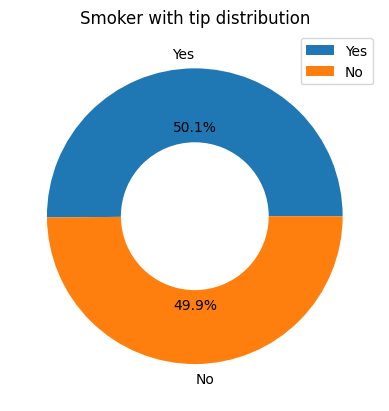

Yes Smoker gives more tip as compared to non-smoker.


In [163]:
plt.pie(smoker_give_tip["tip"],labels=smoker_give_tip["smoker"],autopct="%1.1f%%")
plt.title("Smoker with tip distribution")
plt.pie([1],colors="white",radius=0.5)
plt.legend(loc=1)
plt.show()
print(df.groupby("smoker")["tip"].mean().index[0],"Smoker gives more tip as compared to non-smoker.")

In [164]:
# Which time of day (Lunch vs Dinner) has higher average bills?
df.groupby("time")["total_bill"].mean()

time
Lunch     17.168676
Dinner    20.797159
Name: total_bill, dtype: float64

In [165]:
highest_average_bills_day_type=df.groupby("time")["total_bill"].mean().reset_index()
highest_average_bills_day_type

,time,total_bill
0,Lunch,17.168676
1,Dinner,20.797159


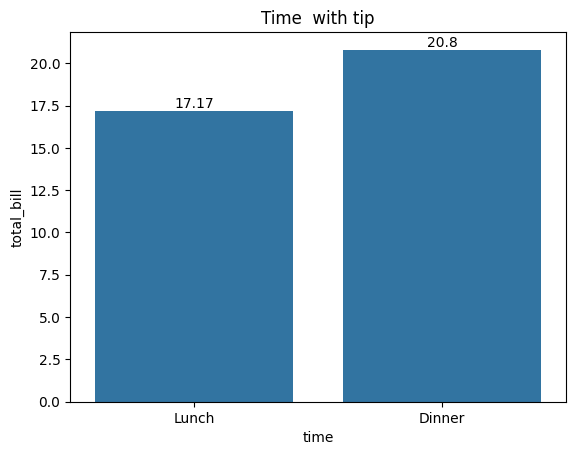

In [166]:
bars=sns.barplot(x="time",y="total_bill",data=highest_average_bills_day_type)
for i in bars.patches:
    height=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height,f"{round(height,2)}",ha="center",va="bottom")
plt.title("Time  with tip")
plt.show()

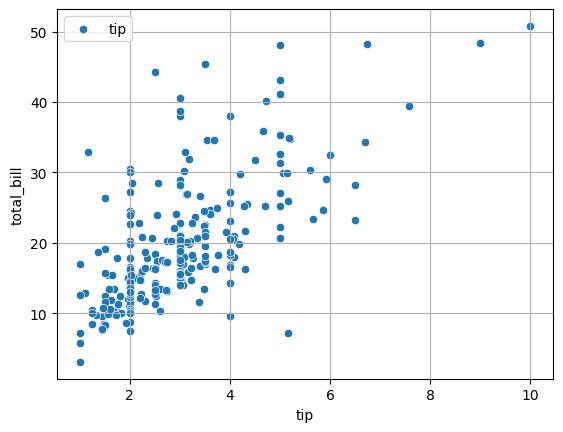

In [167]:
sns.scatterplot(x=df["tip"],y=df["total_bill"],label="tip")
plt.grid(True)
plt.show()

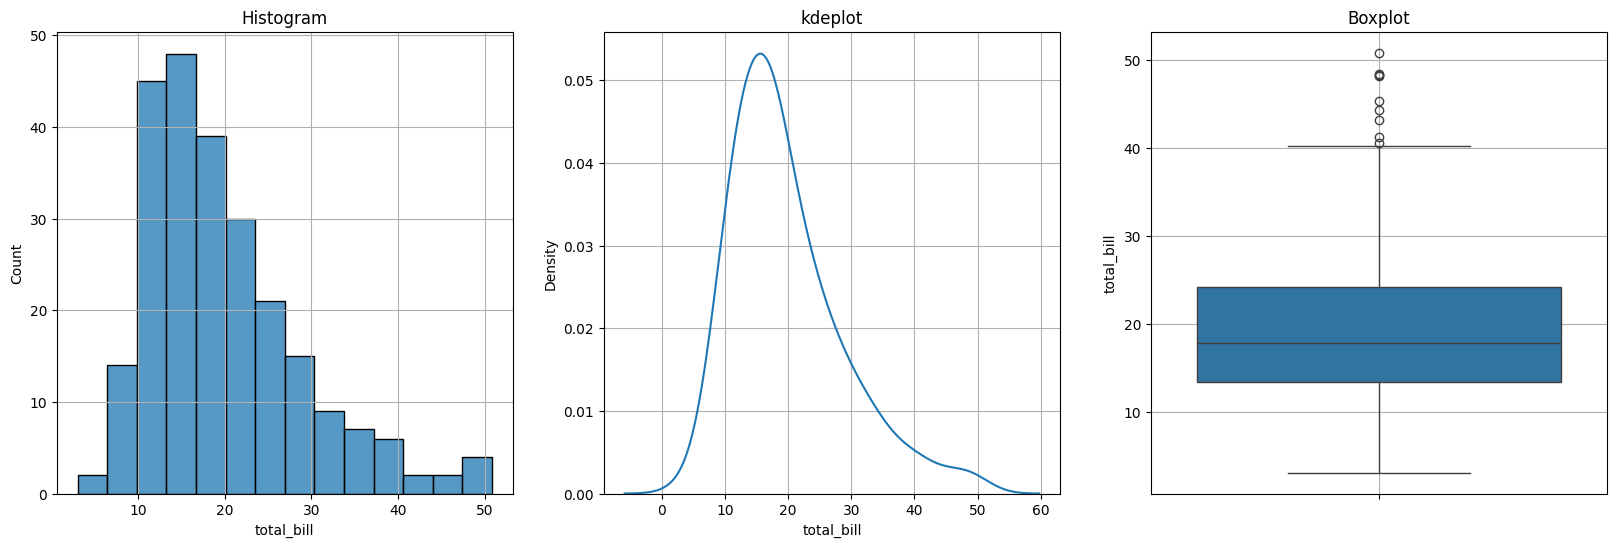

In [168]:
fig,ax=plt.subplots(1,3,figsize=(20,6))
sns.histplot(df["total_bill"],ax=ax[0],label="Histogram")
ax[0].set_title("Histogram")
ax[0].grid(True)
sns.kdeplot(df['total_bill'],ax=ax[1],label="kdeplot")
ax[1].set_title("kdeplot")
ax[1].grid(True)
sns.boxplot(df["total_bill"],ax=ax[2],label="boxplot")
ax[2].set_title("Boxplot")
ax[2].grid(True)
plt.show()

In [169]:
male=df.groupby("sex")["tip"].mean().index[0]
print(male,"provides higher tip as cmpared to women")

Male provides higher tip as cmpared to women


In [170]:
with_higher_tip=df.groupby("sex")["tip"].mean().reset_index()
with_higher_tip

,sex,tip
0,Male,3.089618
1,Female,2.833448


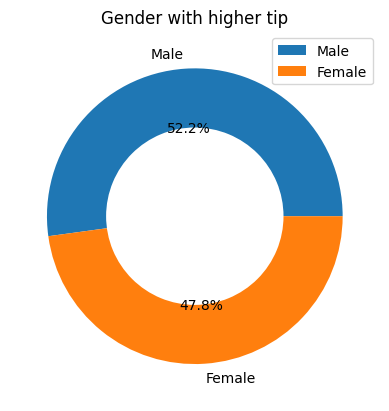

Male provides more tip as comparable to women


In [171]:
plt.pie(with_higher_tip["tip"],labels=with_higher_tip["sex"],autopct="%1.1f%%")
plt.pie([1],colors="white",radius=0.6)
plt.title("Gender with higher tip")
plt.legend(loc=1)
plt.show()
print(df.groupby("sex")["tip"].mean().index[0],"provides more tip as comparable to women")

In [172]:
df["tip_percentage"]=df["tip"]/df["tip"].sum()
df

,total_bill,tip,sex,smoker,day,time,size,Weekend,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0.001381
1,10.34,1.66,Male,No,Sun,Dinner,3,1,0.002269
2,21.01,3.50,Male,No,Sun,Dinner,3,1,0.004784
3,23.68,3.31,Male,No,Sun,Dinner,2,1,0.004524
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0.004935
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,0.008092
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1,0.002734
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,0.002734
242,17.82,1.75,Male,No,Sat,Dinner,2,1,0.002392


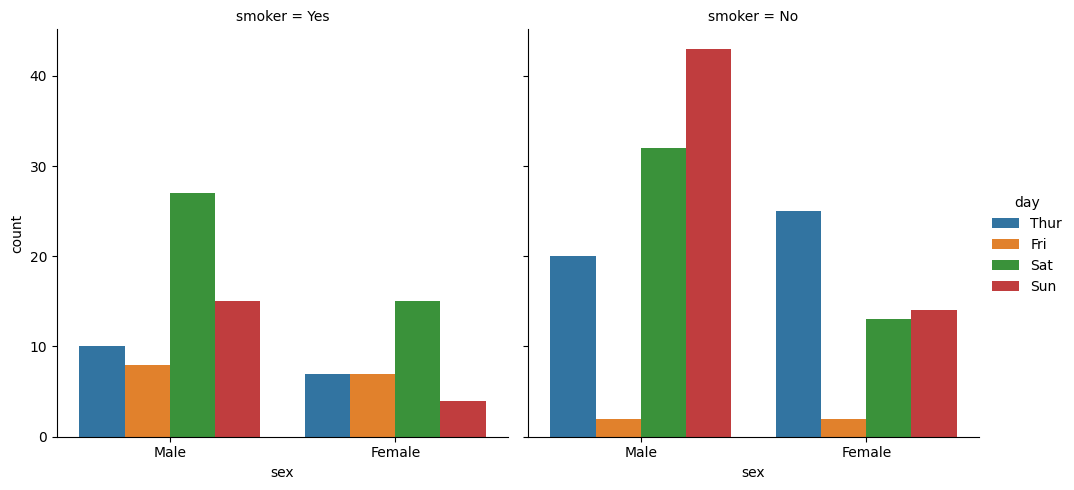

In [173]:
sns.catplot(x=df["sex"],data=df,col="smoker",hue="day",kind="count")
plt.show()

In [174]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,Weekend,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0.001381
1,10.34,1.66,Male,No,Sun,Dinner,3,1,0.002269
2,21.01,3.50,Male,No,Sun,Dinner,3,1,0.004784
3,23.68,3.31,Male,No,Sun,Dinner,2,1,0.004524
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0.004935


In [175]:
#Is there a relationship between party size (size) and tip amount?
party_size_tip_amount=df.groupby("size")["tip"].mean().reset_index()
party_size_tip_amount

,size,tip
0,1,1.437500
1,2,2.582308
2,3,3.393158
3,4,4.135405
4,5,4.028000
5,6,5.225000


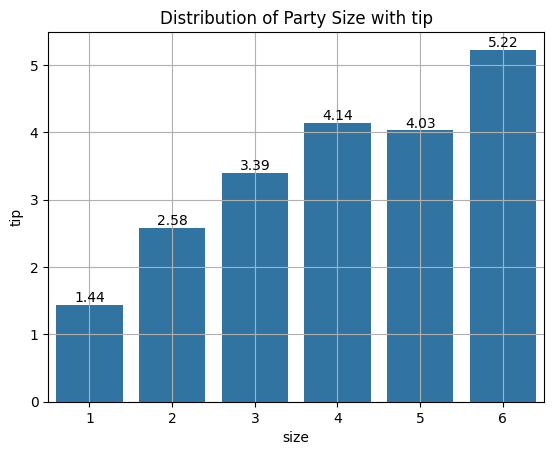

6  party-size provides highest tip with 5.225


In [176]:
bars=sns.barplot(x=party_size_tip_amount["size"],y=party_size_tip_amount["tip"])
for i in bars.patches:
    height=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height,f"{round(height,2)}",ha="center",va="bottom")
plt.title("Distribution of Party Size with tip")
plt.grid(True)
plt.show()
print(df.groupby("size")["tip"].mean().index[5]," party-size provides highest tip with",df.groupby("size")["tip"].mean()[6])


Which day has the highest tip percentage on average?

In [177]:
day_with_tip_percentage=df.groupby("day")["tip_percentage"].mean().reset_index()
day_with_tip_percentage


,day,tip_percentage
0,Thur,0.003788
1,Fri,0.003738
2,Sat,0.004091
3,Sun,0.004449


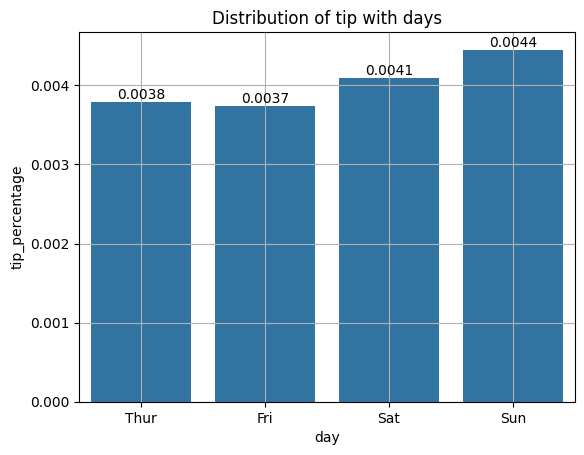

Sun ->Sunday has the highest tip percentage with 0.004449454029562548


In [178]:
bars=sns.barplot(x=day_with_tip_percentage["day"],y=day_with_tip_percentage["tip_percentage"])
for i in bars.patches:
    height=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height,f"{round(height,4)}",ha="center",va="bottom")
plt.title("Distribution of tip with days")
plt.grid(True)
plt.show()
print(df.groupby("day")["tip_percentage"].mean().index[3],"->Sunday has the highest tip percentage with",df.groupby("day")['tip_percentage'].mean()[3])

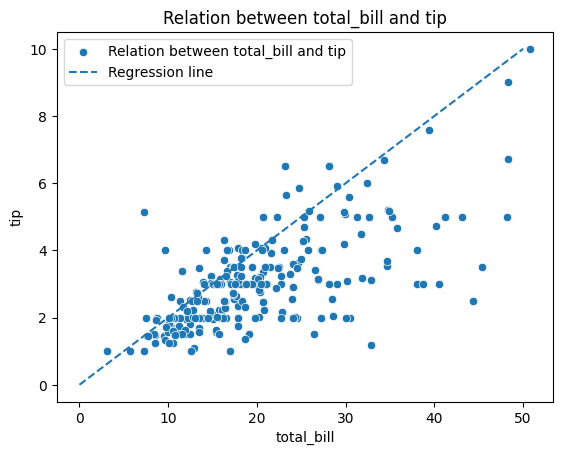

In [179]:
sns.scatterplot(x=df["total_bill"],y=df["tip"],label="Relation between total_bill and tip")
plt.plot([0,50],[0,10],label="Regression line",linestyle="dashed")
plt.legend()
plt.title("Relation between total_bill and tip")
plt.show()

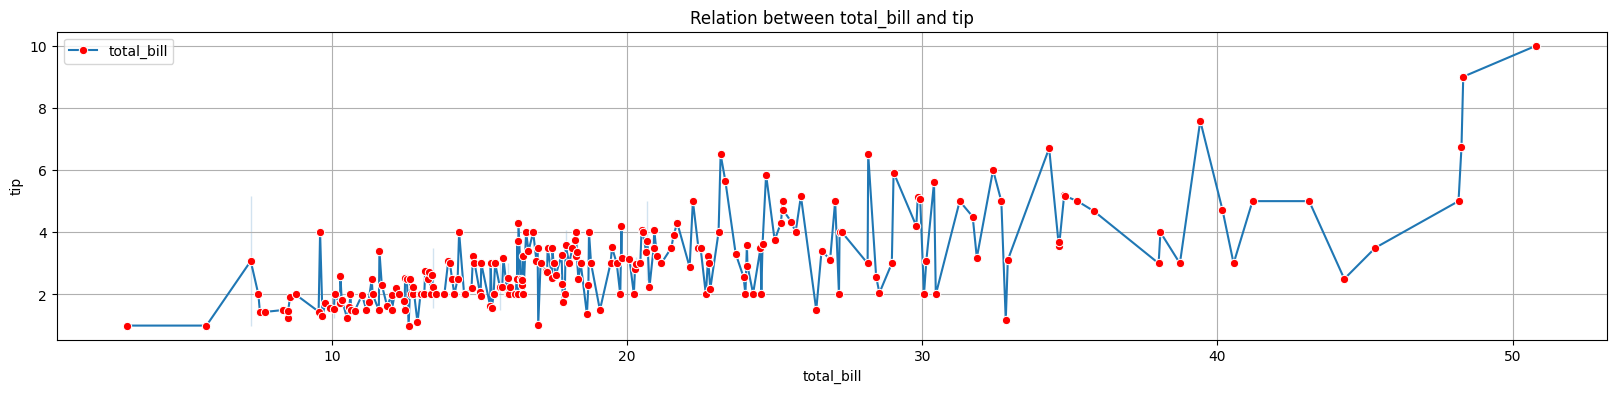

In [180]:
plt.figure(figsize=(20,4))
sns.lineplot(x=df["total_bill"],y=df["tip"],marker="o",markerfacecolor="red",label="total_bill")
plt.title("Relation between total_bill and tip")
plt.legend()
plt.grid(True)
plt.show()

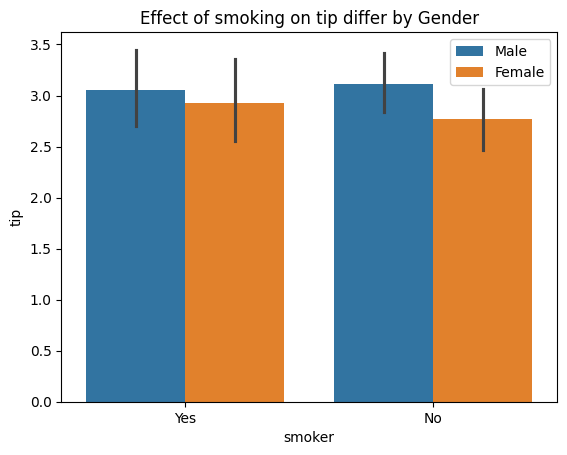

In [181]:
sns.barplot(x=df["smoker"],y=df["tip"],hue=df["sex"])
plt.title("Effect of smoking on tip differ by Gender")
plt.legend()
plt.show()

In [182]:
df_copy=df.copy()
df_copy.drop(["tip_percentage"],axis=1,inplace=True)

In [183]:
df_copy

,total_bill,tip,sex,smoker,day,time,size,Weekend
0,16.99,1.01,Female,No,Sun,Dinner,2,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


In [184]:
corr=df_copy[["total_bill","tip","size"]].corr()
corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


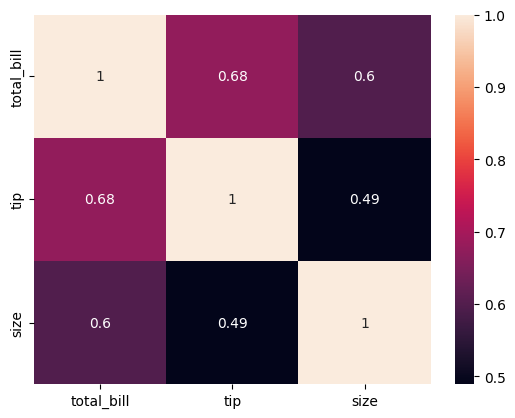

In [185]:
sns.heatmap(corr,annot=True)
plt.show()

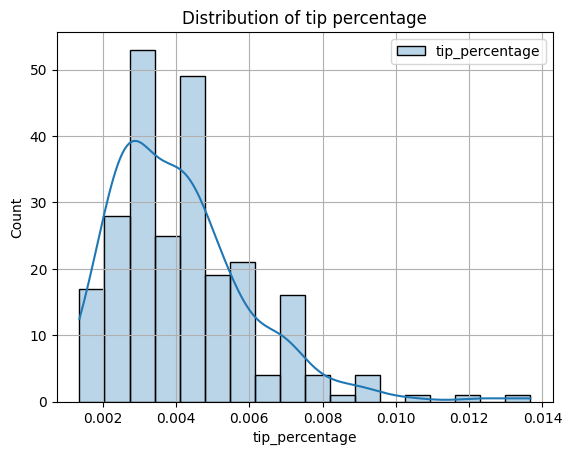

In [186]:
sns.histplot(df["tip_percentage"],kde=True,alpha=0.3,label="tip_percentage")
plt.title("Distribution of tip percentage")
plt.grid(True)
plt.legend()
plt.show()

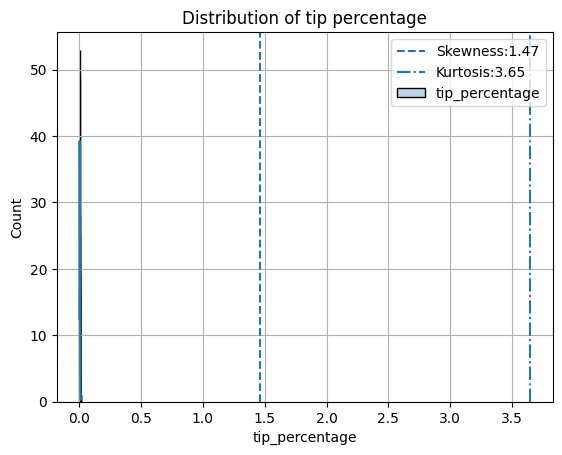

Skewness: 1.47
Kurtosis: 3.65


In [187]:
sns.histplot(df["tip_percentage"],kde=True,alpha=0.3,label="tip_percentage")
plt.title("Distribution of tip percentage")
plt.axvline(df["tip_percentage"].skew(),linestyle="dashed",label="Skewness:{}".format(round(df["tip_percentage"].skew(),2)))
plt.axvline(df["tip_percentage"].kurtosis(),linestyle="dashdot",label="Kurtosis:{}".format(round(df["tip_percentage"].kurtosis(),2)))
plt.legend()
plt.grid(True)
plt.show()
print("Skewness:",round(df["tip_percentage"].skew(),2))
print("Kurtosis:",round(df["tip_percentage"].kurtosis(),2))

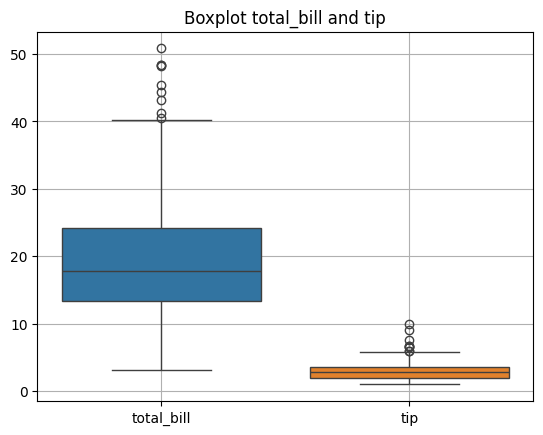

In [188]:
sns.boxplot(df[["total_bill","tip"]])
plt.title("Boxplot total_bill and tip")
plt.grid(True)
plt.show()

In [189]:
tip_with_group=df.groupby("size")["tip_percentage"].mean().reset_index()
tip_with_group

,size,tip_percentage
0,1,0.001965
1,2,0.003530
2,3,0.004638
3,4,0.005653
4,5,0.005506
5,6,0.007142


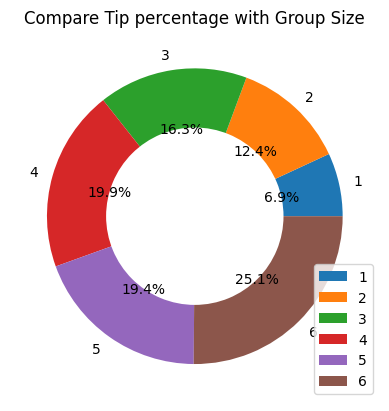

In [190]:
plt.pie(tip_with_group["tip_percentage"],labels=tip_with_group["size"],autopct="%1.1f%%")
plt.pie([1],colors="white",radius=0.6)
plt.legend(loc=4)
plt.title("Compare Tip percentage with Group Size")
plt.show()

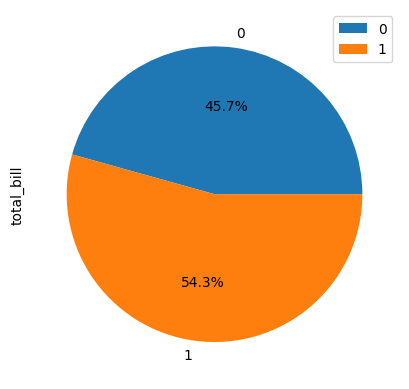

In [191]:
df.groupby("Weekend")["total_bill"].mean().plot(kind="pie",autopct="%1.1f%%")
plt.legend(loc=1)
plt.show()

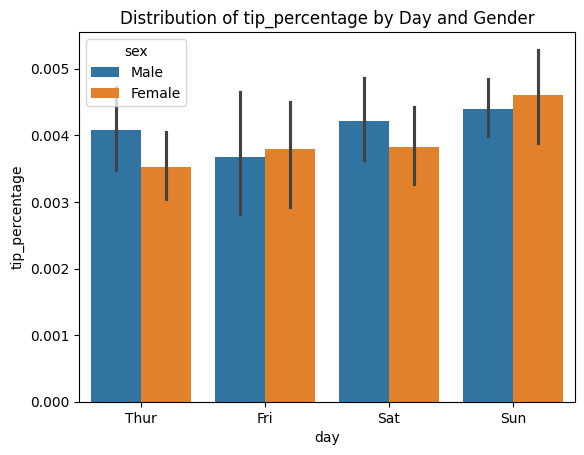

In [192]:
sns.barplot(x=df["day"],y=df['tip_percentage'],hue=df["sex"])
plt.title("Distribution of tip_percentage by Day and Gender")
plt.show()